In [20]:
# import keras dependencies 
from keras.models import Model
from keras.applications import MobileNet as CNN
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.neighbors import NearestNeighbors
import numpy as np
from IPython.display import Image 
from PIL import Image
import matplotlib.pyplot as plt
import pickle

#### Load model pre-trained on `ImageNet` dataset

In [2]:
model = CNN(include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

The above network loads the `MobileNet` model trained on _ImageNet_. We will try and adapt this architecture which is generally effective in classifying images towards exploring features in our de-duplicaion database.
#### Slice network to limit output features
We can now eyeball the function of all network layers in the model. To limit the number of our output features we cut the network off at `Layer(-3)`.

In [3]:
model_slice = Model(inputs=model.input, outputs=model.layers[-3].output)
# model_slice.summary()

This outputs a vector of size `(1, 1, 1000)` for each input image.
#### Ingest test dataset to de-duplicate

In [30]:
img_gen_train = ImageDataGenerator(preprocessing_function=preprocess_input)
TARGET_SIZE = (224, 224)
BATCH_SIZE = 64
IMG_DIR_TRAIN = '/Users/zubin.john/forge/image-dedup/tests/data/convnet_images'


img_batches_train = img_gen_train.flow_from_directory(
    directory=IMG_DIR_TRAIN,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False
)

docs = [doc for doc in os.listdir(f'{IMG_DIR_TRAIN}/0') if doc.endswith('.jpg')]
feat_vecs_train = model_slice.predict_generator(img_batches_train, len(img_batches_train), verbose=1)

Found 13 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step


#### Use NN search to return N most similar images

In [32]:
# Return an iterable dictionary for images
X = np.array([vector[0][0] for vector in feat_vecs_train])

# Search and retrive neighbors for each image

nbrs = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

#### Return most similar images to - ukbench00120

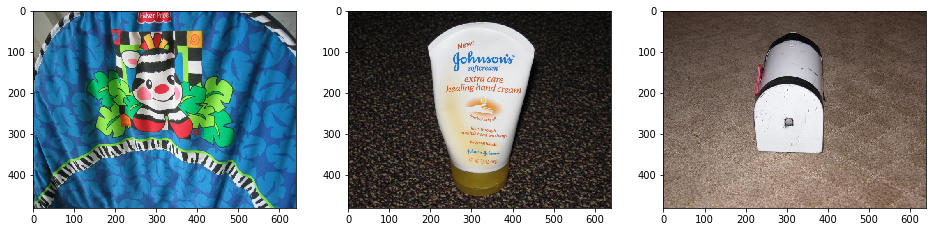

In [33]:
%matplotlib inline
results = {docs[i]: [docs[each] for each in val] for i, val in enumerate(indices)}
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench00120.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

#### Return most similar images to - ukbench09348

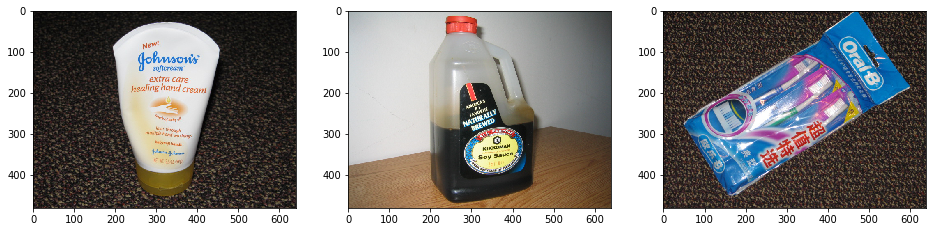

In [34]:
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench09348.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

### Effect of varying slice point
Previously we arbitrarily slice at `Layer(-3)`. We would like to explore the effect of varying the layer which is passed forward.
#### `Layer(-9)`

In [37]:
lm1 = Model(inputs=model.input, outputs=model.layers[-9].output)
lm1_feats = lm1.predict_generator(img_batches_train, len(img_batches_train), verbose=1)

_X = [vec[0][0] for vec in lm1_feats]

l1nbrs = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(_X)
distances, indices = l1nbrs.kneighbors(_X)

1/1 [==============================] - 1s 1s/step


#### Return most similar images to - ukbench00120

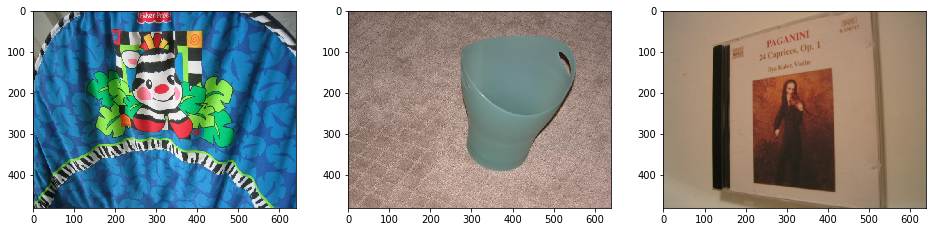

In [9]:
%matplotlib inline
results = {docs[i]: [docs[each] for each in val] for i, val in enumerate(indices)}
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench00120.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

#### Return most similar images to - ukbench09348

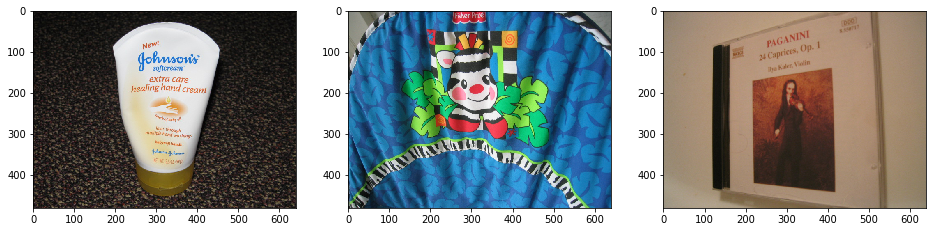

In [10]:
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench09348.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

#### `Layer(-5)`

In [11]:
lm5 = Model(inputs=model.input, outputs=model.layers[-5].output)
lm5_feats = lm5.predict_generator(img_batches_train, len(img_batches_train), verbose=1)

_X = [vec[0][0] for vec in lm5_feats]

l5nbrs = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(_X)
distances, indices = l5nbrs.kneighbors(_X)

1/1 [==============================] - 1s 1s/step


#### Return most similar images to - ukbench00120

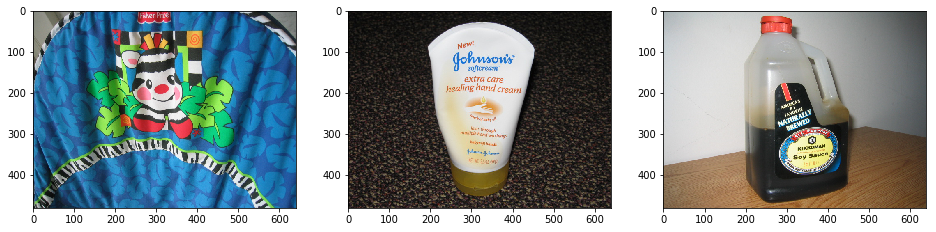

In [12]:
%matplotlib inline
results = {docs[i]: [docs[each] for each in val] for i, val in enumerate(indices)}
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench00120.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

#### Return most similar images to - ukbench09348

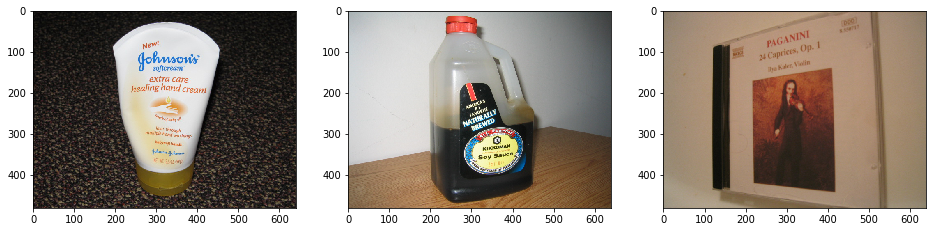

In [13]:
filenames = [f'{IMG_DIR_TRAIN}/0/{res}' for res in results['ukbench09348.jpg']]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i].imshow(image)
plt.show()

## Experimenting on sample dataset
We clearly see that varying input to the prediction layer leads to some diffences in predicting nearest neighbors. We want to formalize these rressults by running the workflow over a larger dataset and benchmarking some results.

#### Ingesting target data

In [14]:
img_gen_train = ImageDataGenerator(preprocessing_function=preprocess_input)
TARGET_SIZE = (224, 224)
BATCH_SIZE = 64
IMG_DIR_TRAIN = '/Users/zubin.john/forge/image-dedup/Transformed_dataset'

img_batches_train = img_gen_train.flow_from_directory(
    directory=IMG_DIR_TRAIN,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False
)

Qdocs = [doc for doc in os.listdir(f'{IMG_DIR_TRAIN}/Query') if doc.endswith('.jpg')]
Rdocs = [doc for doc in os.listdir(f'{IMG_DIR_TRAIN}/Retrieval') if doc.endswith('.jpg')]

len(Qdocs), len(Rdocs)

Found 15300 images belonging to 3 classes.


(2550, 12750)

### Inference Latency

In [15]:
var1 = Model(inputs=model.input, outputs=model.layers[-1].output)
var1_feats = var1.predict_generator(img_batches_train, len(img_batches_train), verbose=1)

240/240 [==============================] - 1272s 5s/step


#### Saving output features from model

In [29]:
with open('cnn_var_1_weights.pkl','wb') as wb:
    pickle.dump(var1_feats, wb)
    
with open('cnn_var_2_weights.pkl','wb') as wb:
    pickle.dump(var2_feats, wb)

In [16]:
var2 = Model(inputs=model.input, outputs=model.layers[-3].output)
var2_feats = var1.predict_generator(img_batches_train, len(img_batches_train), verbose=1)

240/240 [==============================] - 1278s 5s/step


### Accuracy

In [18]:
v1n = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(var1_feats)
%time distances, indices = v1n.kneighbors(var1_feats)

CPU times: user 2min 14s, sys: 382 ms, total: 2min 14s
Wall time: 2min 15s


In [ ]:
X1 = _X = [vec[0][0] for vec in var1_feats]